Regresja

Zadanie 8.

In [1]:
#a)
import pandas as pd

df = pd.read_csv("housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
#b)
print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [3]:
#c)
print(df["ocean_proximity"].unique())

print(df["ocean_proximity"].value_counts())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


Zadanie 9.

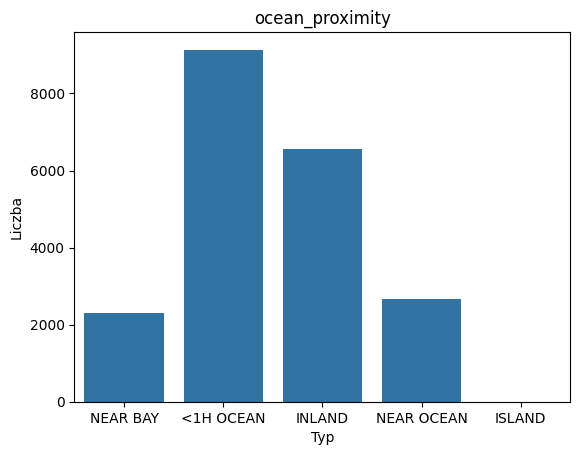

In [4]:
#a)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='ocean_proximity', data=df)

plt.title('ocean_proximity')
plt.xlabel('Typ')
plt.ylabel('Liczba')

plt.show()

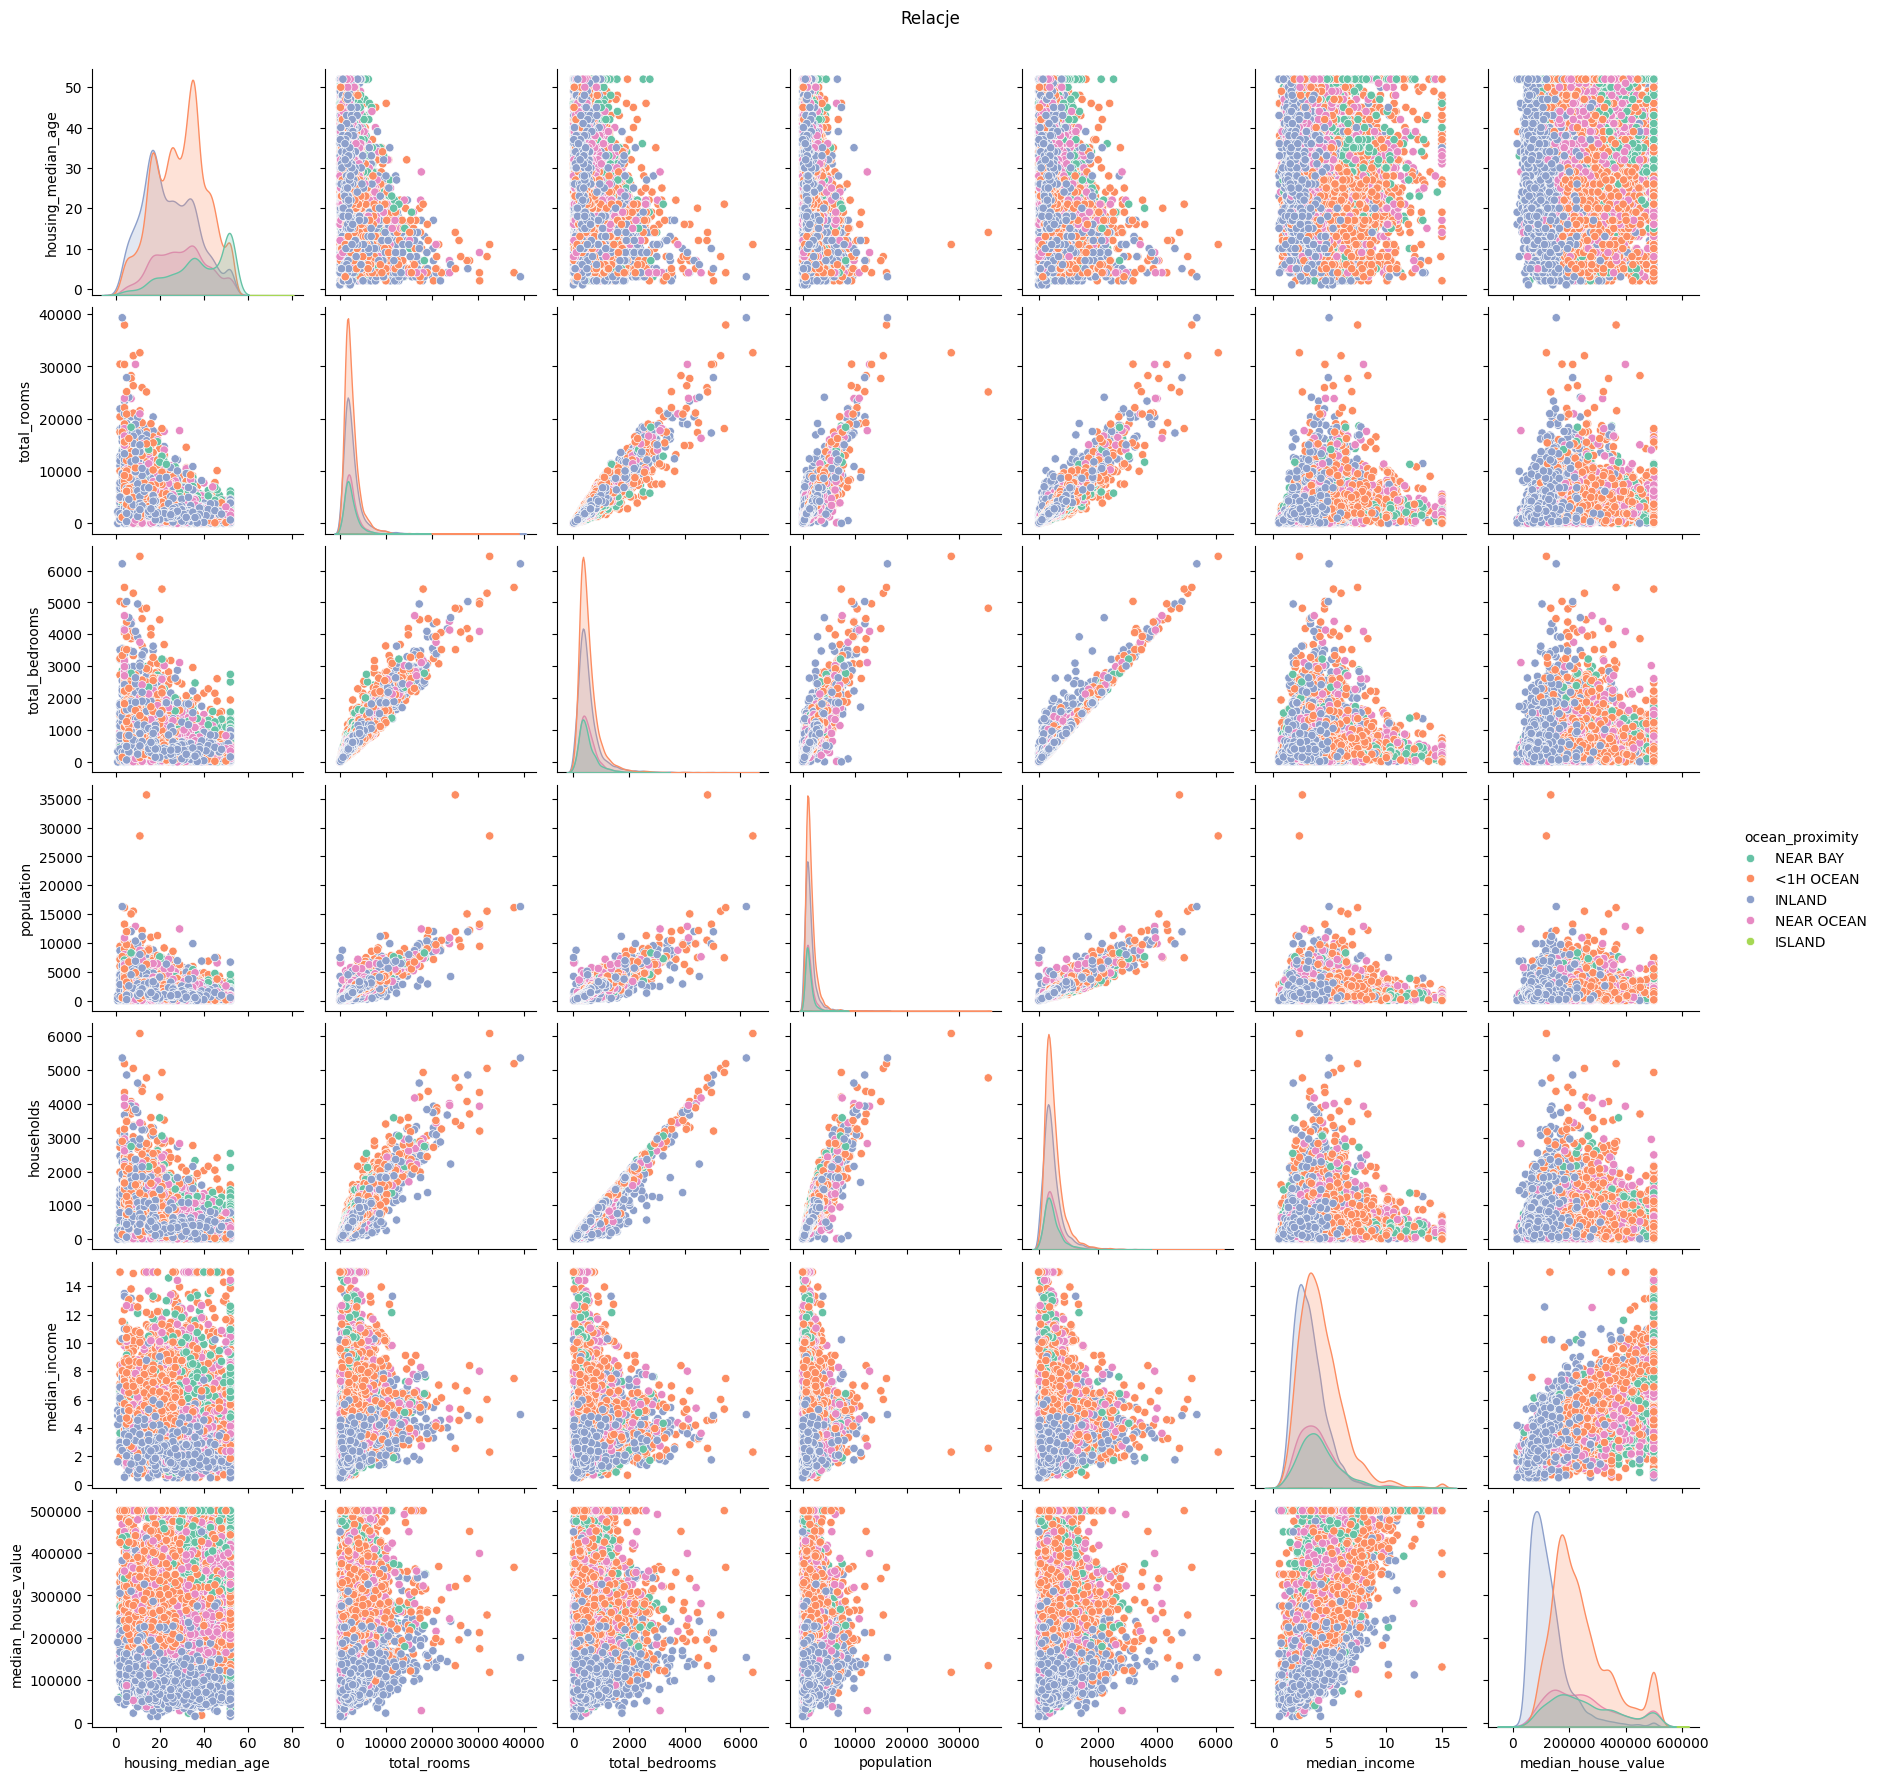

In [5]:
#b)
df_filtered = df.drop(columns=['longitude', 'latitude'])

sns.pairplot(df_filtered, hue='ocean_proximity', palette='Set2')

plt.suptitle('Relacje', y=1.02)

plt.show()

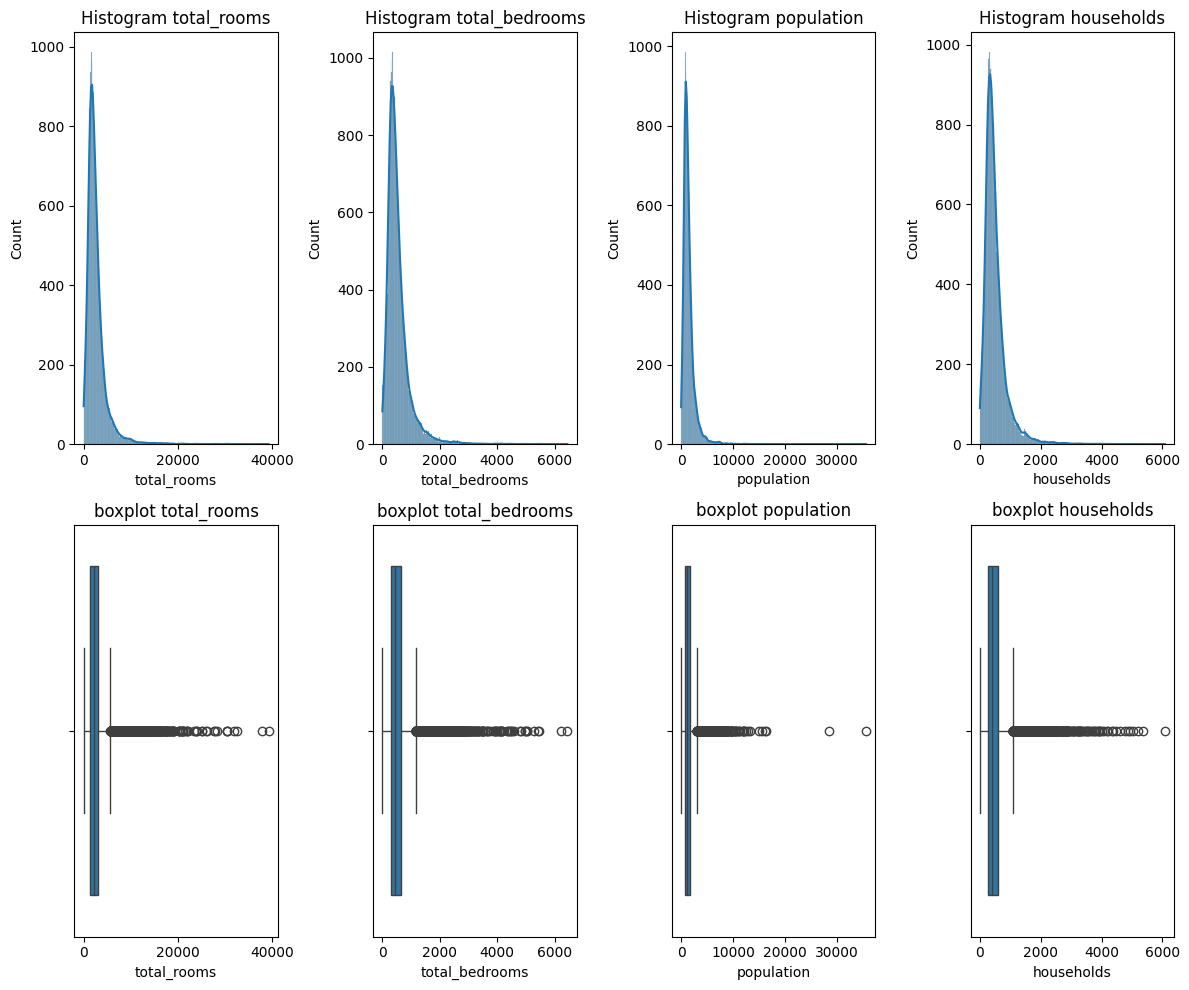

In [6]:
#c)
variables = ['total_rooms', 'total_bedrooms', 'population', 'households']

plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram {var}')

    plt.subplot(2, 4, i + 4)
    sns.boxplot(x=df[var])
    plt.title(f'boxplot {var}')

plt.tight_layout()
plt.show()

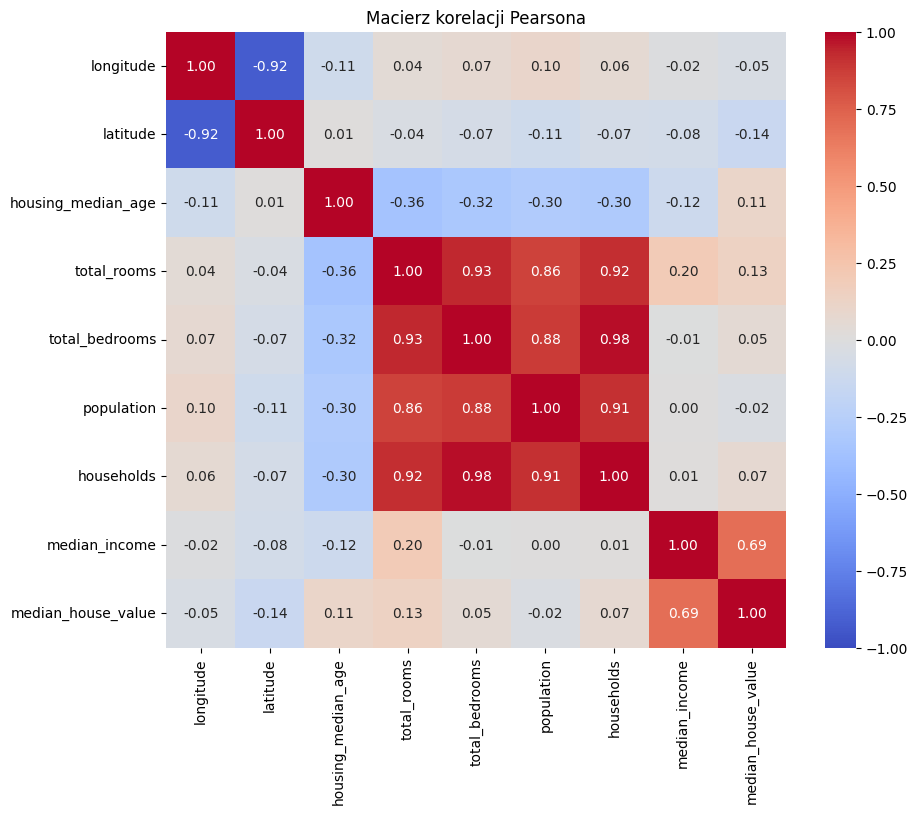

In [7]:
#d)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Macierz korelacji Pearsona')

plt.show()

Zadanie 10.

In [8]:
#a)

#zmienne najśilniej skorelowane ze zmienną "total_bedrooms" to: [total_rooms], [population] oraz [households].

In [9]:
#b)
rows_NA = df['total_bedrooms'].isna()

print(rows_NA)

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool


In [10]:
#c)
X_OK = df[~rows_NA]

X_OK = X_OK[['total_rooms', 'population', 'households']]

print(X_OK.head())

   total_rooms  population  households
0        880.0       322.0       126.0
1       7099.0      2401.0      1138.0
2       1467.0       496.0       177.0
3       1274.0       558.0       219.0
4       1627.0       565.0       259.0


In [11]:
#d)
y_OK = df.loc[~rows_NA, 'total_bedrooms']

print(y_OK.head())

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64


In [12]:
#e)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_OK[['total_rooms', 'population', 'households']], y_OK)

print("Współczynniki regresji:", model.coef_)
print("Wyraz wolny:", model.intercept_)

Współczynniki regresji: [ 0.03986646 -0.03345354  0.96043235]
Wyraz wolny: 0.7599224681702026


In [13]:
#f)
X_NA = df.loc[rows_NA, ['total_rooms', 'population', 'households']]

print(X_NA.head())

     total_rooms  population  households
290       1256.0       570.0       218.0
341        992.0       732.0       259.0
538       5154.0      3741.0      1273.0
563        891.0       384.0       146.0
696        746.0       387.0       161.0


In [16]:
#g)
predicted_values = model.predict(X_NA)

df.loc[rows_NA, 'total_bedrooms'] = predicted_values

In [18]:
print(df['total_bedrooms'].isna().sum())

print(df.info())

print(df.loc[rows_NA].head())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0      241.137932   
341    -122.17     37.75                38.0        992.0      264.571438   
538    -122.2

Zadanie 11.

In [19]:
#a)
X = df.drop('median_house_value', axis=1)

y = df['median_house_value']

print(X.head())
print(y.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [20]:
#b)
cols = ['total_rooms', 'total_bedrooms', 'population', 'households']

X_cleaned = X.copy()

for col in cols:
    mean = X_cleaned[col].mean()
    std = X_cleaned[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    X_cleaned[col] = X_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print(X_cleaned[cols].describe())

        total_rooms  total_bedrooms    population    households
count  20640.000000    20640.000000  20640.000000  20640.000000
mean    2559.915121      524.509400   1391.108439    487.722965
std     1742.921832      349.625016    922.310900    319.058529
min        2.000000        1.000000      3.000000      1.000000
25%     1447.750000      295.130310    787.000000    280.000000
50%     2127.000000      435.000000   1166.000000    409.000000
75%     3148.000000      647.000000   1725.000000    605.000000
max     9180.608836     1801.501684   4822.863109   1646.528939


In [21]:
#c)
ocean_proximity_dic = {
    'ISLAND': 0,
    'NEAR BAY': 0,
    'NEAR OCEAN': 0,
    'INLAND': 1,
    '<1H OCEAN': 2
}

X_cleaned['ocean_proximity'] = X_cleaned['ocean_proximity'].map(ocean_proximity_dic)

print(X_cleaned['ocean_proximity'].unique())

[0 2 1]


In [22]:
#d)
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_2 = poly2.fit_transform(X_cleaned)

poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_3 = poly3.fit_transform(X_cleaned)

print("X_cleaned: ", X_cleaned.shape)
print("X_2: ", X_2.shape)
print("X_3: ", X_3.shape)

X_cleaned:  (20640, 9)
X_2:  (20640, 54)
X_3:  (20640, 219)


Zadanie 12.

In [25]:
#a)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("X2_train:", X2_train.shape, "X2_test:", X2_test.shape)
print("X3_train:", X3_train.shape, "X3_test:", X3_test.shape)

X_train: (16512, 9) X_test: (4128, 9)
X2_train: (16512, 54) X2_test: (4128, 54)
X3_train: (16512, 219) X3_test: (4128, 219)


In [26]:
#b)
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

poly2_model = LinearRegression()
poly2_model.fit(X2_train, y2_train)

poly3_model = LinearRegression()
poly3_model.fit(X3_train, y3_train)

LinearRegression()

In [27]:
#c)

y_train_preds = linear_model.predict(X_train)
y_test_preds = linear_model.predict(X_test)

y2_train_preds = poly2_model.predict(X2_train)
y2_test_preds = poly2_model.predict(X2_test)

y3_train_preds = poly3_model.predict(X3_train)
y3_test_preds = poly3_model.predict(X3_test)

print("Predykcje (trening):", y_train_preds[:5])
print("Predykcje (test):", y_test_preds[:5])

print("\nPredykcje 2 stopnia (trening):", y2_train_preds[:5])
print("Predykcje 2 stopnia (test):", y2_test_preds[:5])

print("\nPredykcje 3 stopnia (trening):", y3_train_preds[:5])
print("Predykcje 3 stopnia (test):", y3_test_preds[:5])

Predykcje (trening): [164641.44726202 296349.94317514 256958.19125908 128163.50851821
 180151.76544633]
Predykcje (test): [ 47106.13167707 177034.04065484 346970.76842357 273443.51826964
 268770.1964441 ]

Predykcje 2 stopnia (trening): [134610.65719231 368207.2713122  275378.47621896 102302.42060888
 159510.85415823]
Predykcje 2 stopnia (test): [ 49596.76417946 147265.33440377 469895.9846699  267900.13053958
 298150.45558199]

Predykcje 3 stopnia (trening): [128329.05476126 378222.84556376 231139.82892436  90174.64402815
 166973.81956199]
Predykcje 3 stopnia (test): [ 62716.53551508 142274.17641634 486482.90706551 262478.27866936
 287838.12388828]


Zadanie 13.

In [28]:
#a)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# regresja liniowa
mae_train_linear = mean_absolute_error(y_train, y_train_preds)
mae_test_linear = mean_absolute_error(y_test, y_test_preds)

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_preds))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_preds))

r2_train_linear = r2_score(y_train, y_train_preds)
r2_test_linear = r2_score(y_test, y_test_preds)

# regresji wielomianowa 2 stopnia
mae_train_poly2 = mean_absolute_error(y2_train, y2_train_preds)
mae_test_poly2 = mean_absolute_error(y2_test, y2_test_preds)

rmse_train_poly2 = np.sqrt(mean_squared_error(y2_train, y2_train_preds))
rmse_test_poly2 = np.sqrt(mean_squared_error(y2_test, y2_test_preds))

r2_train_poly2 = r2_score(y2_train, y2_train_preds)
r2_test_poly2 = r2_score(y2_test, y2_test_preds)

# regresja wielomianowa 3 stopnia
mae_train_poly3 = mean_absolute_error(y3_train, y3_train_preds)
mae_test_poly3 = mean_absolute_error(y3_test, y3_test_preds)

rmse_train_poly3 = np.sqrt(mean_squared_error(y3_train, y3_train_preds))
rmse_test_poly3 = np.sqrt(mean_squared_error(y3_test, y3_test_preds))

r2_train_poly3 = r2_score(y3_train, y3_train_preds)
r2_test_poly3 = r2_score(y3_test, y3_test_preds)

print("Regresja liniowa:")
print(f"MAE (trening): {mae_train_linear:.4f}, MAE (test): {mae_test_linear:.4f}")
print(f"RMSE (trening): {rmse_train_linear:.4f}, RMSE (test): {rmse_test_linear:.4f}")
print(f"R² (trening): {r2_train_linear:.4f}, R² (test): {r2_test_linear:.4f}\n")

print("Regresja wielomianowa 2 stopnia:")
print(f"MAE (trening): {mae_train_poly2:.4f}, MAE (test): {mae_test_poly2:.4f}")
print(f"RMSE (trening): {rmse_train_poly2:.4f}, RMSE (test): {rmse_test_poly2:.4f}")
print(f"R² (trening): {r2_train_poly2:.4f}, R² (test): {r2_test_poly2:.4f}\n")

print("Regresja wielomianowa 3 stopnia:")
print(f"MAE (trening): {mae_train_poly3:.4f}, MAE (test): {mae_test_poly3:.4f}")
print(f"RMSE (trening): {rmse_train_poly3:.4f}, RMSE (test): {rmse_test_poly3:.4f}")
print(f"R² (trening): {r2_train_poly3:.4f}, R² (test): {r2_test_poly3:.4f}")

Regresja liniowa:
MAE (trening): 49858.0824, MAE (test): 50438.6099
RMSE (trening): 68068.1510, RMSE (test): 68991.2954
R² (trening): 0.6534, R² (test): 0.6368

Regresja wielomianowa 2 stopnia:
MAE (trening): 43107.2546, MAE (test): 43741.5445
RMSE (trening): 60805.7595, RMSE (test): 62020.0080
R² (trening): 0.7234, R² (test): 0.7065

Regresja wielomianowa 3 stopnia:
MAE (trening): 40162.6085, MAE (test): 41314.1898
RMSE (trening): 56906.1911, RMSE (test): 58959.9499
R² (trening): 0.7578, R² (test): 0.7347


In [29]:
#b)

data = {
    'Model': ['Regresja Liniowa', 'Regresja Wielomianowa 2 stopnia', 'Regresja Wielomianowa 3 stopnia'],
    'MAE (Trening)': [mae_train_linear, mae_train_poly2, mae_train_poly3],
    'MAE (Test)': [mae_test_linear, mae_test_poly2, mae_test_poly3],
    'RMSE (Trening)': [rmse_train_linear, rmse_train_poly2, rmse_train_poly3],
    'RMSE (Test)': [rmse_test_linear, rmse_test_poly2, rmse_test_poly3],
    'R² (Trening)': [r2_train_linear, r2_train_poly2, r2_train_poly3],
    'R² (Test)': [r2_test_linear, r2_test_poly2, r2_test_poly3]
}

evaluation_df = pd.DataFrame(data)

evaluation_df.set_index('Model', inplace=True)

print(evaluation_df)

                                 MAE (Trening)    MAE (Test)  RMSE (Trening)  \
Model                                                                          
Regresja Liniowa                  49858.082428  50438.609896    68068.151016   
Regresja Wielomianowa 2 stopnia   43107.254575  43741.544514    60805.759510   
Regresja Wielomianowa 3 stopnia   40162.608546  41314.189826    56906.191097   

                                  RMSE (Test)  R² (Trening)  R² (Test)  
Model                                                                   
Regresja Liniowa                 68991.295406      0.653400   0.636770  
Regresja Wielomianowa 2 stopnia  62020.007983      0.723414   0.706467  
Regresja Wielomianowa 3 stopnia  58959.949944      0.757752   0.734718  


Zadanie 14.

In [32]:
#a)

# wyższe wielomiany

poly4 = PolynomialFeatures(degree=4, include_bias=False)
poly5 = PolynomialFeatures(degree=5, include_bias=False)

X_4 = poly4.fit_transform(X_cleaned)
X_5 = poly5.fit_transform(X_cleaned)

# split

X_train_4, X_test_4, y_train, y_test = train_test_split(X_4, y, test_size=0.2, random_state=42)
X_train_5, X_test_5, y_train, y_test= train_test_split(X_5, y, test_size=0.2, random_state=42)

model_4 = LinearRegression()
model_5 = LinearRegression()

model_4.fit(X_train_4, y_train)
model_5.fit(X_train_5, y_train)

# predykcje
y_train_preds_4 = model_4.predict(X_train_4)
y_test_preds_4 = model_4.predict(X_test_4)

y_train_preds_5 = model_5.predict(X_train_5)
y_test_preds_5 = model_5.predict(X_test_5)

# metryki
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# metryki stopnia 4
mae_train_4, rmse_train_4, r2_train_4 = calculate_metrics(y_train, y_train_preds_4)
mae_test_4, rmse_test_4, r2_test_4 = calculate_metrics(y_test, y_test_preds_4)

# metryki stopnia 5
mae_train_5, rmse_train_5, r2_train_5 = calculate_metrics(y_train, y_train_preds_5)
mae_test_5, rmse_test_5, r2_test_5 = calculate_metrics(y_test, y_test_preds_5)

data_poly = {
    'Model': ['Regresja Wielomianowa 4 stopnia', 'Regresja Wielomianowa 5 stopnia'],
    'MAE (Trening)': [mae_train_4, mae_train_5],
    'MAE (Test)': [mae_test_4, mae_test_5],
    'RMSE (Trening)': [rmse_train_4, rmse_train_5],
    'RMSE (Test)': [rmse_test_4, rmse_test_5],
    'R² (Trening)': [r2_train_4, r2_train_5],
    'R² (Test)': [r2_test_4, r2_test_5]
}

evaluation_poly_df = pd.DataFrame(data_poly)
evaluation_poly_df.set_index('Model', inplace=True)

print(evaluation_poly_df)

                                 MAE (Trening)    MAE (Test)  RMSE (Trening)  \
Model                                                                          
Regresja Wielomianowa 4 stopnia   39729.418758  41525.257510    55689.093242   
Regresja Wielomianowa 5 stopnia   40346.789753  44870.824116    56337.361188   

                                  RMSE (Test)  R² (Trening)  R² (Test)  
Model                                                                   
Regresja Wielomianowa 4 stopnia  60730.254668      0.768004   0.718549  
Regresja Wielomianowa 5 stopnia  85730.729618      0.762571   0.439125  


In [33]:
#b)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
ocean_encoded = encoder.fit_transform(df[['ocean_proximity']])

ocean_encoded_df = pd.DataFrame(ocean_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

df_encoded = df.drop(columns=['ocean_proximity'])
df_encoded = pd.concat([df_encoded, ocean_encoded_df], axis=1)

X = df_encoded.drop(columns=['median_house_value'])
y = df_encoded['median_house_value']

# wielomian 4
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_features_4.fit_transform(X)

# wielomian 5
poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_features_5.fit_transform(X)

# Podział
from sklearn.model_selection import train_test_split
X_train_4, X_test_4, y_train, y_test = train_test_split(X_poly_4, y, test_size=0.2, random_state=42)
X_train_5, X_test_5, _, _ = train_test_split(X_poly_5, y, test_size=0.2, random_state=42)

# Regresja wielomianu 4
model_4 = LinearRegression()
model_4.fit(X_train_4, y_train)

# Predykcja
y_train_preds_4 = model_4.predict(X_train_4)
y_test_preds_4 = model_4.predict(X_test_4)

# Regresja wielomianu 5
model_5 = LinearRegression()
model_5.fit(X_train_5, y_train)

# Predykcja
y_train_preds_5 = model_5.predict(X_train_5)
y_test_preds_5 = model_5.predict(X_test_5)

# metryki dla stopnia 4
mae_train_4 = mean_absolute_error(y_train, y_train_preds_4)
mae_test_4 = mean_absolute_error(y_test, y_test_preds_4)
rmse_train_4 = np.sqrt(mean_squared_error(y_train, y_train_preds_4))
rmse_test_4 = np.sqrt(mean_squared_error(y_test, y_test_preds_4))
r2_train_4 = r2_score(y_train, y_train_preds_4)
r2_test_4 = r2_score(y_test, y_test_preds_4)

# metryki dla stopnia 5
mae_train_5 = mean_absolute_error(y_train, y_train_preds_5)
mae_test_5 = mean_absolute_error(y_test, y_test_preds_5)
rmse_train_5 = np.sqrt(mean_squared_error(y_train, y_train_preds_5))
rmse_test_5 = np.sqrt(mean_squared_error(y_test, y_test_preds_5))
r2_train_5 = r2_score(y_train, y_train_preds_5)
r2_test_5 = r2_score(y_test, y_test_preds_5)

# wyniki
data = {
    'Model': ['Regresja Wielomianowa 4 stopnia', 'Regresja Wielomianowa 5 stopnia'],
    'MAE (Trening)': [mae_train_4, mae_train_5],
    'MAE (Test)': [mae_test_4, mae_test_5],
    'RMSE (Trening)': [rmse_train_4, rmse_train_5],
    'RMSE (Test)': [rmse_test_4, rmse_test_5],
    'R² (Trening)': [r2_train_4, r2_train_5],
    'R² (Test)': [r2_test_4, r2_test_5]
}

evaluation_df = pd.DataFrame(data)

evaluation_df.set_index('Model', inplace=True)

print(evaluation_df)

                                 MAE (Trening)     MAE (Test)  RMSE (Trening)  \
Model                                                                           
Regresja Wielomianowa 4 stopnia   40733.604663   47289.125373    56981.176825   
Regresja Wielomianowa 5 stopnia   52795.904189  127534.129889    71696.655708   

                                  RMSE (Test)  R² (Trening)   R² (Test)  
Model                                                                    
Regresja Wielomianowa 4 stopnia  1.277839e+05      0.757113   -0.246078  
Regresja Wielomianowa 5 stopnia  2.076791e+06      0.615463 -328.138564  


In [ ]:
#c)

#Ramka jest w podpunkcie powyżej

# Na podstawie wyników widać ewidentne oznaki overfittingu modelu. Tak jak dla regresji wielomianowej 4 stopnia wyniki - pomimo, że są bardzo niepokojące - to nie są kompletnie bezużyteczne,
# tak dla regresji wielomianu 5 stopnia wszystkie miary udowadniają, że model się przeuczył. Różnice między wartościami testowymi a treningowymi są olbrzymie. Wartości miar są ponad wszelką skalę.
# Model nie nadaje się do przwidywań.